# Import Packages

In [1]:
import pandas as pd

# Load Dataset

In [2]:
data = pd.read_csv('Survival_Prediction_ML/data.csv')

# Explore and Clean data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [5]:
data=data.dropna()

In [6]:
data=data.reset_index()

In [7]:
data = data.drop(['index'],axis=1)

# Data Visualization

In [8]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd8a86d08>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd8a92e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd8a86208>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd8a98f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd8a98e88>],
 'means': []}

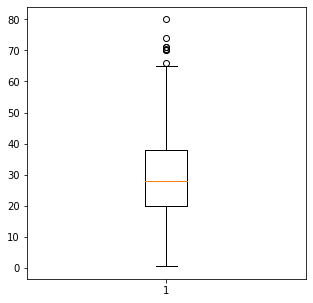

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.boxplot(data.Age)

In [10]:
data = data[data.Age<65]

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


# Label Encoding of Categorical Data (Manual)

In [12]:
categories = data['Sex'].value_counts().index.to_list()

In [13]:
categories

['male', 'female']

In [14]:
reverse_map_ColumnName = dict(enumerate(categories))

In [15]:
reverse_map_ColumnName

{0: 'male', 1: 'female'}

In [16]:
map_columnName = dict(zip(reverse_map_ColumnName.values(),reverse_map_ColumnName.keys()))

In [17]:
map_columnName

{'male': 0, 'female': 1}

In [18]:
data['Sex'].replace(map_columnName,inplace=True)

In [19]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,29.1250,Q
708,0,2,0,27.0,0,0,13.0000,S
709,1,1,1,19.0,0,0,30.0000,S
710,1,1,0,26.0,0,0,30.0000,C


In [20]:
categories1 = data['Embarked'].value_counts().index.to_list()
reverse_dict = dict(enumerate(categories1))
og_dict = dict(zip(reverse_dict.values(),reverse_dict.keys()))
data['Embarked'].replace(og_dict,inplace=True)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Standardization of Numeric Data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
data1= data['Fare'].values
data1=data1.reshape(-1, 1)

In [24]:
std= StandardScaler().fit(data1)

In [25]:
data2 = std.transform(data1)

In [26]:
data['Fare'] = data2

In [27]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,-0.514780,0
1,1,1,1,38.0,1,0,0.687984,1
2,1,3,1,26.0,0,0,-0.502101,0
3,1,1,1,35.0,1,0,0.346439,0
4,0,3,0,35.0,0,0,-0.499753,0
...,...,...,...,...,...,...,...,...
707,0,3,1,39.0,0,5,-0.103893,2
708,0,2,0,27.0,0,0,-0.406775,0
709,1,1,1,19.0,0,0,-0.087457,0
710,1,1,0,26.0,0,0,-0.087457,1


# Seperation of Data and Target columns

In [28]:
X = data.drop(['Survived'],axis=1)

In [29]:
y = data['Survived']

# Test Train data Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Logistic regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

C:\Users\Anmol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Analysis of the Logistic regression model

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8388625592417062

# Naive Bayes Model

In [34]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

# Analysis of the Naive Bayes model

In [35]:
accuracy1 = accuracy_score(y_test,y_pred)
accuracy1

0.8246445497630331

# Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

# Analysis of the Decision Tree model

In [37]:
accuracy2 = accuracy_score(y_test,y_pred)
accuracy2

0.8246445497630331

# Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=150)
model3.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Analysis of the Random Forest model

In [39]:
accuracy3 = accuracy_score(y_test,y_pred)
accuracy3

0.8388625592417062

In [40]:
print(accuracy)
print(accuracy1)
print(accuracy2)
print(accuracy3)

0.8388625592417062
0.8246445497630331
0.8246445497630331
0.8388625592417062


# Using GridSearch for Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()

params = [{'n_estimators':[100,150,200],'max_depth':[15,20,50],'max_features':[3, 5 , 7]}]

clf = GridSearchCV(rfc, params, cv=5, scoring = 'accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [44]:
print(clf.best_params_)

{'max_depth': 50, 'max_features': 3, 'n_estimators': 100}


# Using Best Parameters

In [45]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=100,max_depth=50,max_features=3)
model4.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [46]:
accuracy4 = accuracy_score(y_test,y_pred)
accuracy4

0.8388625592417062

In [47]:
print(accuracy)
print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)

0.8388625592417062
0.8246445497630331
0.8246445497630331
0.8388625592417062
0.8388625592417062
